# Dungeons & Dragons Attribute Roll Statistics

This project was meant to be an exercise that is on one hand simple and on the other organized like a serious development project (documentation, tests, etc...). The idea was to make a template for future projects. The main computational task accomplished is the fitting of a bell curve to some statistics that come out of the Dungeons & Dragons roll playing game.

In Dungeons & Dragons, an attribute of a character is determined by a roll score and a possible automatic increase. The roll score is obtained by rolling four six-sided dice and then summing the heighest heighest three rolls of the four. Sometimes the attribute score is automatically increased from the roll score by a certian number given by the character's race, class, etc. Here we consider the statistics of the roll score alone. 

In [ ]:
# Frest start

reset()


In [ ]:
# Load a sage file that produces dnd ability roll data

# load("dnd_ability_rolls.sage")
import sagednd.dnd_ability_rolls as dnd
get_dnd_ability_rolls = dnd.get_dnd_ability_rolls
dnd_ability_roll_score = dnd.dnd_ability_roll_score

# load("abstract_fitting.sage")
import sagednd.abstract_fitting as af
tune = af.tune


In [ ]:
# Get the data we want to analyze

rolls = get_dnd_ability_rolls()
roll_scores = [dnd_ability_roll_score(r) for r in rolls]



In [ ]:
# Compute some statistics

average_roll = mean(roll_scores)*1.0
roll_median = median(roll_scores)*1.0
roll_mode = mode(roll_scores)
roll_deviation = float(std(roll_scores, bias = False))




In [ ]:
# Print results of elementary analysis
# average_roll; roll_mode; roll_median; round(roll_deviation);

print('\n')
print('average roll = '+str(average_roll)+'\n')
print('roll mode = '+str(roll_mode)+'\n')
print('roll median = '+str(roll_median)+'\n')
print('roll deviation = '+str(roll_deviation)+'\n')



In [ ]:
# Visualization Preparation
# Prepare a histogram

roll_count = [roll_scores.count(i) for i in range(4,19)]
roll_hist = histogram(roll_scores, bins=16)



In [ ]:
# Display visualization...looks like a bell curve...

roll_hist



In [ ]:
# Basic data to find a "best bell curve"
# "nheight" is a feature-normalized parameter. 
# It was introduced after we noticed "height" converged much more slowly than the other parameters.

square_error(err) = err^2
fb(x,nheight,sigma,mu) = nheight*10*exp(-(x-mu)^2/2/sigma^2)



In [ ]:
# Find the "best" bell curve using gradient descent and starting from the numbers above

(c_sigma, c_mu) = (roll_deviation, average_roll)
mode_num = roll_scores.count(roll_mode)
c_nheight = float(mode_num/(10 * exp(-(0)^2/2/c_sigma^2)))
(tuned_params, lahs) = tune(roll_count, square_error, fb, fb.args()[1:], matrix([[c_nheight],[c_sigma],[c_mu-4]]), 0.00005, 5000)
print(tuned_params)
print('\n')
print(lahs)



In [10]:
# Use the "best" result to prepare a bell curve

(nheight, sigma, mum4) = tuned_params.list()
best_bell(x) = nheight * 10 * exp(-(x-(mum4+4))^2/2/sigma^2)
best_plot = plot(best_bell(x), (x,3,22), color = 'red')




In [11]:
# A sequence of successive approximations starting from (15,15,15), plotted later (for effect :))

(s_nheight, s_sigma, s_mu) = (15, 15, 15) 
starting_bell(x) = s_nheight * 10 * exp(-(x-s_mu)^2/2/(s_sigma)^2)
steps = 200
tuning_sequence = [tune(roll_count, square_error, fb, fb.args()[1:], matrix([[s_nheight],[s_sigma],[s_mu-4]]), 0.00005, i) for i in range(steps)[1::floor(steps)/10]]






In [12]:
# Preparations to plot the results

tuned_eval_dicts = [dict(zip([str(a) for a in fb.args()[1:]],p[0].list())) for p in tuning_sequence]
tuned_bells = [fb(x=x-4,**d) for d in tuned_eval_dicts]
tuned_plots = [plot(b, (x,3,22), color = 'black') for b in tuned_bells]
starting_plot =  plot(starting_bell, (x,3,22), color = 'green')



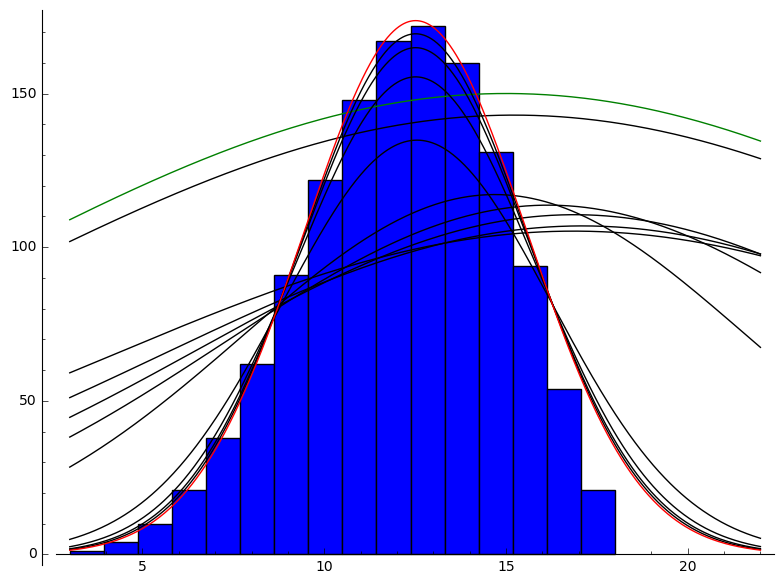

In [13]:
# Display both the histogram and bell curves.
# The starting curve is green, and the limit curve is red.

sum([roll_hist]+[starting_plot]+tuned_plots+[best_plot])



In [14]:
# Out of curiosity, the parameters and loss for closest black curve to the red curve

tuning_sequence[-1]



(
[16.943558668933022]                   
[3.1100734085938826]                   
[ 8.513689818920193], 457.1336002172256
)